In [ ]:
pip install nbimporter

In [1]:
import numpy as np 
import nbimporter
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

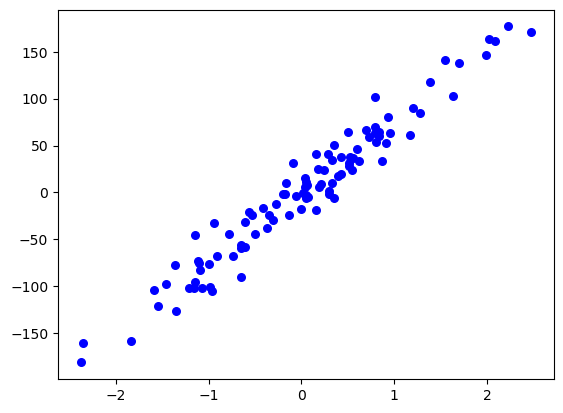

In [3]:
X,y = datasets.make_regression(n_samples=100, n_features = 1, noise = 20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234) 

fig = plt.figure()
plt.scatter(X[:,0],y, color='b',marker='o',s=30)
plt.show()

In [8]:
from linear_regression import LinearRegression
regressor = LinearRegression(lr=0.01)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

def mse(y_true, y_predicted):
    return np.mean((y_true-y_predicted)**2)

mse_value = mse(y_test,predicted)
print(mse_value)

305.7719958301902


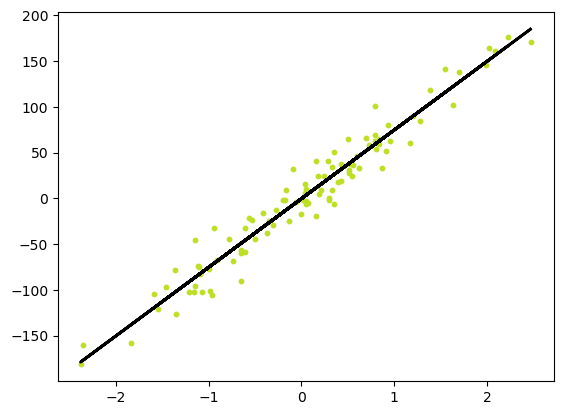

In [9]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
m1 = plt.scatter(X_train, y_train, color = cmap(0.9),s=10)
m2 = plt.scatter(X_test, y_test, color = cmap(0.9),s=10)
plt.plot(X, y_pred_line, color = 'black', linewidth = 2, label='prediction' )
plt.show()